## Imports

In [1]:
import pandas as pd
import numpy as np
import MDP as mdp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import kernel_ridge

## Read Data

In [2]:
X_data = pd.read_csv('./data/X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
X_data = X_data.reshape((84,720))

Y_data = pd.read_csv('./data/Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
Y_data = Y_data.reshape((84,720))

block_names = pd.read_csv('./data/block_names.csv')
block_names = np.array(block_names['0'].tolist())

## Split Training/Test Data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=1/7, random_state=42)
print('Training Data Size:', len(x_train))
print('Testing Data Size:', len(x_test))

Training Data Size: 72
Testing Data Size: 12


## K-Mean Clustering

In [4]:
n_clusters = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_train)
clusters = kmeans.predict(x_train)

In [5]:
x_bins = [[],[],[],[],[],[]]
y_bins = [[],[],[],[],[],[]]
label_bins = [[],[],[],[],[],[]]

for cluster, i in zip(clusters, range(len(clusters))):
    x_bins[cluster].append(x_train[i])
    y_bins[cluster].append(y_train[i])
    label_bins[cluster].append(block_names[i])

In [6]:
# To visualize the data use PCA to reduce dimension to 2 and plot scatter plot
pca_2d = PCA(n_components=2)
PCA_2d = pca_2d.fit_transform(x_train)

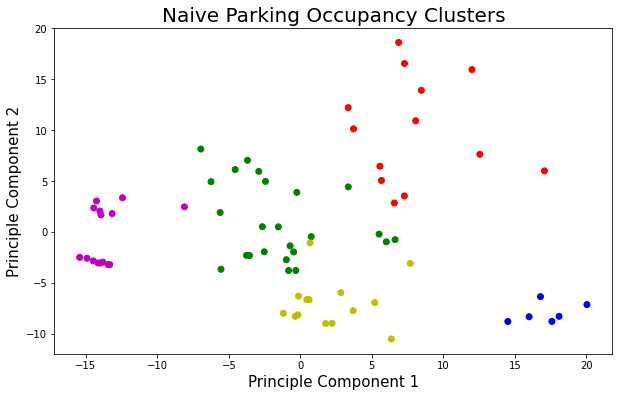

In [7]:
colors = ['b', 'g', 'r', 'm', 'y']
color_map = []
for index in clusters:
    color_map.append(colors[index])
plt.figure(figsize=(10,6))
plt.scatter(PCA_2d[:,0], PCA_2d[:,1], color=color_map)
plt.title("Naive Parking Occupancy Clusters", fontsize=20)
plt.ylabel("Principle Component 2", fontsize=15)
plt.xlabel("Principle Component 1", fontsize=15)
plt.show()

 ## Based Case Test

In [8]:
lambda_val = 0.1
gamma = 0.001
rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

In [9]:
rrg.fit(x_train, y_train)
y_pred = rrg.predict(x_test)
mae = np.mean(np.abs(y_test-y_pred))
print('Base Case MAE:', mae)

Base Case MAE: 0.1201346901630227


## Q-Learning

In [20]:
train_data = (x_bins, y_bins)
test_data = (x_test, y_test)
max_bins = [len(x_bins[i]) for i in range(n_clusters)]
print('max bins:', max_bins)

max bins: [6, 24, 13, 15, 14]


In [28]:
model = mdp.BanditMDP(train_data, test_data, max_bins)

In [42]:
n_iteration = 10000
for i in range(n_iteration):
    model.run_iteration()

-4
[6, 12, 10, 10, 0]
-3
[6, 12, 9, 10, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6184675652529866
4
[6, 12, 9, 11, 0]
-5
[6, 12, 9, 11, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6179163326983473
-5
[6, 12, 9, 11, 0]
-1
[5, 12, 9, 11, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]]
Reward: 0.618304664636

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.5941432100925724
-5
[6, 16, 9, 3, 1]
2
[6, 17, 9, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.587843744802339
-3
[6, 17, 8, 3, 1]
-3
[6, 17, 7, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.592594646165817
-5
[6, 17, 7, 3, 0]
0
[[1.316 1.316 1.316 ... 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6009305673421016
-4
[5, 15, 7, 4, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]]
Reward: 0.5991943443059781
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]]
Reward: 0.5991943443059781
-5
[5, 15, 7, 4, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.

Reward: 0.6671500720031569
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.25  ... 1.167 1.167 1.167]
 [0.167 0.167 0.25  ... 1.333 1.333 1.333]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6671500720031569
-1
[5, 8, 5, 0, 1]
2
[5, 9, 5, 0, 1]
4
[5, 9, 5, 1, 1]
-1
[4, 9, 5, 1, 1]
4
[4, 9, 5, 2, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6661910770663375
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6661910770663375
-5

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6671783248688729
1
[4, 8, 1, 8, 1]
-5
[4, 8, 1, 8, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6676580370256128
-5
[4, 8, 1, 8, 1]
-1
[3, 8, 1, 8, 1]
-5
[3, 8, 1, 8, 0]
1
[4, 8, 1, 8, 0]
-5
[4, 8, 1, 8, 1]
-5
[4, 8, 1, 8, 0]
-5
[4, 8, 1, 8, 1]
-4
[4, 8, 1, 7, 1]
-5
[4, 8, 1, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.429 0.429 0.571 ... 1.    1.    1.   ]
 [0.5   0.5   0.5   ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6678930562979123
-5
[6, 8, 3, 1, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.5   0.5   0.5   ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6674133441269503
-5
[6, 8, 3, 1, 0]
-5
[6, 8, 3, 1, 1]
-4
[6, 8, 3, 0, 1]
-1
[5, 8, 3, 0, 1]
4
[5, 8, 3, 1, 1]
1
[6, 8, 3, 1, 1]
-5
[6, 8, 3, 1, 0]
-5
[6, 8, 3, 1, 1]
-5
[6, 8, 3, 1, 0]
-3
[6, 8, 2, 1, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.25  0.25  0.25  ... 1.    1.    1.   ]
 [0.429 0.429 0.571 ... 1.    

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.663771632279909
3
[5, 10, 5, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.6636596886165946
-5
[5, 10, 5, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6631911362693894
-5
[5, 10, 5, 3, 0]
-5
[5, 10, 5, 3, 1]
4
[5, 10, 5, 4, 1]
1
[6, 10, 5, 4, 1]
-3
[6, 

Reward: 0.6165063686467063
5
[3, 13, 2, 8, 1]
-5
[3, 13, 2, 8, 0]
1
[4, 13, 2, 8, 0]
2
[4, 14, 2, 8, 0]
-4
[4, 14, 2, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6040956512975377
-5
[4, 14, 2, 7, 1]
3
[4, 14, 3, 7, 1]
2
[4, 15, 3, 7, 1]
-1
[3, 15, 3, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6042089608296133
-4
[3, 15, 3, 6, 1]
-5
[3, 15, 3, 6, 0]
1
[4, 15, 3, 6, 0]
-4
[4, 15, 3, 5, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 .

Reward: 0.6012225029595336
-4
[1, 15, 2, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.429 0.429 0.571 ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]]
Reward: 0.6025459036774911
-5
[1, 15, 2, 2, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6028052520675385
2
[1, 16, 2, 2, 1]
-2
[1, 15, 2, 2, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6028052520675385
-1
[0, 15, 2, 2

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5966565728310058
4
[2, 17, 1, 3, 1]
1
[3, 17, 1, 3, 1]
2
[3, 18, 1, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5851644013571589
-5
[3, 18, 1, 3, 0]
-2
[3, 17, 1, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.5950738124731428
-5
[3, 17, 1, 3, 1]
-5
[3,

[2, 20, 3, 6, 1]
-3
[2, 20, 2, 6, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5784839932937331
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5784839932937331
-2
[2, 19, 2, 6, 1]
-4
[2, 19, 2, 5, 1]
-5
[2, 19, 2, 5, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.580518536919697
2
[2, 20, 2, 5, 0]
-2
[2,

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.5631207607752238
-5
[4, 24, 2, 5, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5631632154432404
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5631632154432404
5
[4, 24, 2, 5, 2]
-2
[4, 23, 2, 5, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5782474701263226
-5
[1, 20, 5, 6, 0]
5
[1, 20, 5, 6, 1]
-5
[1, 20, 5, 6, 0]
-4
[1, 20, 5, 5, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.5775006160106717
5
[1, 20, 5, 5, 1]
2
[1, 21, 5, 5, 1]
-1
[0, 21, 5, 5, 1]
1
[1, 21, 5, 5, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6030189784079253
1
[5, 16, 5, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6030189768511379
1
[6, 16, 5, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6030189771089737
-1
[5, 16, 5, 7, 0]
-4
[5, 16, 5, 6, 0]
-1
[4, 16, 5, 6, 0]
2
[4, 17, 5, 6, 0]
0
[[1.

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5697220113963715
-5
[1, 22, 5, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.5692991076548346
-3
[1, 22, 4, 14, 0]
2
[1, 23, 4, 14, 0]
-5
[1, 23, 4, 14, 1]
3
[1, 23, 5, 14, 1]
-5
[1, 23, 5, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.5620024899989995

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5592718667164954
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5592718667164954
2
[6, 24, 3, 14, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5592718667164954
1
[6, 24, 3, 14, 1]
-2
[6, 23, 3, 14, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.3

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.5716662000535448
-4
[6, 21, 4, 14, 0]
-4
[6, 21, 4, 13, 0]
-5
[6, 21, 4, 13, 1]
-5
[6, 21, 4, 13, 0]
-2
[6, 20, 4, 13, 0]
-5
[6, 20, 4, 13, 1]
-1
[5, 20, 4, 13, 1]
3
[5, 20, 5, 13, 1]
3
[5, 20, 6, 13, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5721077984853348
-5
[5, 20, 6, 13, 0]
5
[5, 20, 6, 13, 1]
-5
[5, 20, 6, 13, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.5583795398937683
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.5583795398937683
-3
[6, 24, 4, 12, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.5584914835570877
4
[6, 24, 4, 13, 0]
-5
[6, 24, 4, 13, 1]
-3
[6, 24, 3, 13, 1]
-3
[6, 24, 2, 13, 1]
0
[[1.316 1.316 1.3

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.5730552010449503
-5
[1, 20, 3, 10, 1]
-5
[1, 20, 3, 10, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.5730552010449503
5
[1, 20, 3, 10, 1]
-5
[1, 20, 3, 10, 0]
-5
[1, 20, 3, 10, 1]
-5
[1, 20, 3, 10, 0]
5
[1, 20, 3, 10, 1]
-5
[1, 20, 3, 10, 0]
5
[1, 20, 3, 10, 1]
-5
[1, 20, 3, 10, 0]
4
[1, 20, 3, 11, 0]
-5
[1, 20, 3, 11, 1]
-5
[1, 20, 3, 11, 0]
-5
[1, 20, 3, 11, 1]
-5
[1, 20, 3, 11, 0]
1
[2, 20, 3, 11, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.  

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.5958282754074614
1
[4, 17, 0, 9, 2]
-5
[4, 17, 0, 9, 1]
2
[4, 18, 0, 9, 1]
3
[4, 18, 1, 9, 1]
-3
[4, 18, 0, 9, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5856869847380894
-4
[4, 18, 0, 8, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5856946969177836
-3
[4,

Reward: 0.6015816547779982
-5
[2, 14, 3, 3, 0]
-5
[2, 14, 3, 3, 1]
-5
[2, 14, 3, 3, 0]
-5
[2, 14, 3, 3, 1]
-5
[2, 14, 3, 3, 0]
-5
[2, 14, 3, 3, 1]
-5
[2, 14, 3, 3, 0]
-1
[1, 14, 3, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.6013223092634418
-5
[1, 14, 3, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.601581655352994
4
[1, 14, 3, 4, 1]
-2
[1, 13, 3, 4, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5

Reward: 0.6630456722157722
-1
[1, 8, 3, 15, 0]
1
[2, 8, 3, 15, 0]
-5
[2, 8, 3, 15, 1]
2
[2, 9, 3, 15, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6619044626173985
4
[2, 9, 3, 15, 1]
-5
[2, 9, 3, 15, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6623730228113025
-5
[2, 9, 3, 15, 1]
-5
[2, 9, 3, 15, 0]
2
[2, 10, 3, 15, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6255092283167062
-5
[4, 12, 1, 12, 1]
-4
[4, 12, 1, 11, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6254057909168279
5
[4, 12, 1, 11, 2]
2
[4, 13, 1, 11, 2]
-3
[4, 13, 0, 11, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6139032841536209
-3
[4, 13, 1, 11, 2]

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6065040541643332
-5
[1, 13, 9, 12, 0]
4
[1, 13, 9, 13, 0]
-1
[0, 13, 9, 13, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6064277467388226
4
[0, 13, 9, 14, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6063651682910975
-5
[0, 13, 9, 14, 1]
-3
[0, 13, 8, 14, 1]

Reward: 0.5917027594291755
3
[1, 15, 10, 15, 2]
-4
[1, 15, 10, 14, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.591824042705528
2
[1, 16, 10, 14, 2]
2
[1, 17, 10, 14, 2]
4
[1, 17, 10, 15, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.5846828085894088
-5
[1, 17, 10, 15, 1]
-3
[1, 17, 9, 15, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.6

-5
[0, 21, 6, 15, 1]
-5
[0, 21, 6, 15, 0]
-5
[0, 21, 6, 15, 1]
-5
[0, 21, 6, 15, 0]
-5
[0, 21, 6, 15, 1]
-5
[0, 21, 6, 15, 0]
-3
[0, 21, 5, 15, 0]
-5
[0, 21, 5, 15, 1]
1
[1, 21, 5, 15, 1]
4
[1, 21, 5, 15, 1]
-1
[0, 21, 5, 15, 1]
-5
[0, 21, 5, 15, 0]
-5
[0, 21, 5, 15, 1]
-5
[0, 21, 5, 15, 0]
-4
[0, 21, 5, 14, 0]
1
[1, 21, 5, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.571674030550051
-5
[1, 21, 5, 14, 1]
-1
[0, 21, 5, 14, 1]
-5
[0, 21, 5, 14, 0]
2
[0, 22, 5, 14, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.569299107655593


[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.5694081937048544
-5
[1, 19, 10, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.569433913401957
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.569433913401957
-5
[1, 19, 10, 12, 0]
-3
[1, 19, 9, 12, 0]
-5
[1, 19, 9, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]
 [0.583 0.583 0.583 ... 0.    0.    0.   ]]
Reward: 0.5604464982426721
-5
[1, 23, 6, 11, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.5604565858883905
-5
[1, 23, 6, 11, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5604989440562513
-5
[1, 23, 6, 11, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0

3
[6, 16, 5, 7, 0]
-5
[6, 16, 5, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6032783269932531
-5
[6, 16, 5, 7, 0]
-5
[6, 16, 5, 7, 1]
-5
[6, 16, 5, 7, 0]
-1
[5, 16, 5, 7, 0]
-5
[5, 16, 5, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6032783267354099
-3
[5, 16, 4, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0. 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6616489709316952
5
[4, 9, 5, 10, 2]
-4
[4, 9, 5, 9, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6654189079733108
-1
[3, 9, 5, 9, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6654189079013925
-5
[3, 9, 5, 9, 1]
-5
[3, 9, 5, 9, 0]
4
[3, 9, 5, 10, 0]
-5
[3, 9,

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6625621466178234
-5
[1, 10, 8, 8, 1]
5
[1, 10, 8, 8, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6621409275747141
-4
[1, 10, 8, 7, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6643792116278964
1
[2, 10, 8, 7, 2]
-1
[1, 10, 8, 7, 2]
-1
[0, 10, 8, 7, 2]
2
[0,

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.75  0.75  0.75  ... 0.75  0.75  0.75 ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6632435397744858
-5
[3, 10, 7, 1, 0]
5
[3, 10, 7, 1, 1]
4
[3, 10, 7, 2, 1]
-5
[3, 10, 7, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.75  0.75  0.75  ... 0.75  0.75  0.75 ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]]
Reward: 0.6633736291151412
1
[4, 10, 7, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.75  0.75  0.75  ... 0.75  0.75  0.75 ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]]
Reward: 0.6633736291868739
-5
[4, 10, 7, 2, 1]
0
[[1.

Reward: 0.6174824477813758
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6174824477813758
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6174824477813758
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6174824477813758
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.42

Reward: 0.6004821598380641
-5
[2, 16, 3, 3, 1]
-5
[2, 16, 3, 3, 0]
-2
[2, 15, 3, 3, 0]
-5
[2, 15, 3, 3, 1]
-5
[2, 15, 3, 3, 0]
-5
[2, 15, 3, 3, 1]
1
[3, 15, 3, 3, 1]
1
[4, 15, 3, 3, 1]
-5
[4, 15, 3, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.6011993861185323
-5
[4, 15, 3, 3, 1]
-3
[4, 15, 2, 3, 1]
-5
[4, 15, 2, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.6012225024794169
2
[4, 16, 2, 3, 0]
2
[4, 17, 2, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ...

Reward: 0.6028549089042379
-5
[5, 15, 1, 8, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6028617947055475
-5
[5, 15, 1, 8, 1]
-5
[5, 15, 1, 8, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6026269779466894
-3
[5, 15, 0, 8, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6026419228474461
-5
[5, 15, 0, 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6196372282514632
1
[6, 13, 1, 7, 0]
-1
[5, 13, 1, 7, 0]
-5
[5, 13, 1, 7, 1]
-5
[5, 13, 1, 7, 0]
-5
[5, 13, 1, 7, 1]
-5
[5, 13, 1, 7, 0]
-2
[5, 12, 1, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6319008531357315
-5
[5, 12, 1, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.   

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6287396545770481
-5
[5, 12, 3, 9, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.628351329110561
-5
[5, 12, 3, 9, 0]
-5
[5, 12, 3, 9, 1]
-5
[5, 12, 3, 9, 0]
1
[6, 12, 3, 9, 0]
-5
[6, 12, 3, 9, 1]
-5
[6, 12, 3, 9, 0]
-2
[6, 11, 3, 9, 0]
2
[6, 12, 3, 9, 0]
2
[6, 13, 3, 9, 0]
-1
[5, 13, 3, 9, 0]
-5
[5, 13, 3, 9, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6018573539961025
-5
[6, 14, 2, 8, 1]
-3
[6, 14, 1, 8, 1]
2
[6, 15, 1, 8, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6028863268555882
-5
[6, 15, 1, 8, 0]
2
[6, 16, 1, 8, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6019097528111113
-5
[6, 16, 1, 8, 1]
0
[[1

Reward: 0.618721541355161
-5
[5, 13, 3, 7, 1]
-1
[4, 13, 3, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6191226833527784
-4
[4, 13, 3, 6, 1]
-2
[4, 12, 3, 6, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6294904387554758
-5
[4, 12, 3, 6, 0]
4
[4, 12, 3, 7, 0]
3
[4, 12, 4, 7, 0]
4
[4, 12, 4, 8, 0]
1
[5, 12, 4, 8, 0]
-5
[5, 12, 4, 8, 1]
-3
[5, 12, 3, 8, 1]
-4
[5, 12, 3, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.

Reward: 0.6643676566131786
-5
[6, 10, 1, 3, 1]
-3
[6, 10, 0, 3, 1]
-4
[6, 10, 0, 2, 1]
3
[6, 10, 1, 2, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6656437205292358
-5
[6, 10, 1, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.25  0.25  0.25  ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]]
Reward: 0.6661122728781186
-3
[6, 10, 0, 2, 0]
1
[6, 10, 0, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.625 0.625 0.625]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5

Reward: 0.6327347141126225
-3
[1, 11, 1, 7, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6336273525433498
-5
[1, 11, 1, 7, 1]
-4
[1, 11, 1, 6, 1]
-3
[1, 11, 0, 6, 1]
-3
[1, 11, 1, 6, 1]
1
[2, 11, 1, 6, 1]
5
[2, 11, 1, 6, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6325209497817982
-5
[2, 11, 1, 6, 1]
-1
[1, 11, 1, 6, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.5756235220984648
-3
[1, 19, 4, 10, 0]
-1
[0, 19, 4, 10, 0]
-5
[0, 19, 4, 10, 1]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.576005187873684
1
[1, 19, 4, 10, 1]
-5
[1, 19, 4, 10, 0]
-5
[1, 19, 4, 10, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5760051878729255

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.5962010560269331
-5
[2, 14, 8, 12, 1]
-5
[2, 14, 8, 12, 0]
5
[2, 14, 8, 12, 1]
2
[2, 15, 8, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5963374790024947
3
[2, 15, 9, 12, 1]
-4
[2, 15, 9, 11, 1]
-5
[2, 15, 9, 11, 0]
-5
[2, 15, 9, 11, 1]
-5
[2, 15, 9, 11, 0]
-5
[2, 15, 9, 11, 1]
-1
[1, 15, 9, 11, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6249406061462752
-5
[1, 11, 7, 15, 0]
-5
[1, 11, 7, 15, 1]
-5
[1, 11, 7, 15, 0]
-5
[1, 11, 7, 15, 1]
-5
[1, 11, 7, 15, 0]
-3
[1, 11, 6, 15, 0]
2
[1, 12, 6, 15, 0]
3
[1, 12, 7, 15, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6232604938010262
-5
[1, 12, 7, 15, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6555145375390965
-5
[1, 9, 10, 13, 0]
-5
[1, 9, 10, 13, 1]
-5
[1, 9, 10, 13, 0]
-2
[1, 8, 10, 13, 0]
5
[1, 8, 10, 13, 1]
2
[1, 9, 10, 13, 1]
-5
[1, 9, 10, 13, 0]
-5
[1, 9, 10, 13, 1]
-5
[1, 9, 10, 13, 0]
-5
[1, 9, 10, 13, 1]
3
[1, 9, 11, 13, 1]
2
[1, 10, 11, 13, 1]
-5
[1, 10, 11, 13, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6543311571245264
-5
[1, 10, 11, 13, 1]
-5
[1, 10, 11, 13, 0]
-5
[1, 10, 11, 13, 1]
-5
[1, 10, 11, 13, 0]
-5
[1, 10, 11, 13, 1]
-5
[1, 10, 11, 13, 0]
-5
[1, 10, 11

[4, 9, 11, 10, 0]
1
[5, 9, 11, 10, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]]
Reward: 0.6557568283161797
3
[5, 9, 12, 10, 0]
-3
[5, 9, 11, 10, 0]
-5
[5, 9, 11, 10, 1]
-5
[5, 9, 11, 10, 0]
-5
[5, 9, 11, 10, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6552882682951664
-5
[5, 9, 11, 10, 0]
-5
[5, 9, 11, 10, 1]
-5
[5, 9, 11, 10, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.6204370286144026
1
[3, 11, 10, 12, 0]
4
[3, 11, 10, 13, 0]
-4
[3, 11, 10, 12, 0]
-5
[3, 11, 10, 12, 1]
2
[3, 12, 10, 12, 1]
-4
[3, 12, 10, 11, 1]
-5
[3, 12, 10, 11, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]]
Reward: 0.6183043577520102
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]]

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6667011110100985
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6667011110100985
-4
[2, 7, 8, 10, 1]
5
[2, 7, 8, 10, 2]
-5
[2, 7, 8, 10, 1]
5
[2, 7, 8, 10, 2]
-5
[2, 7, 8, 10, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.666863975159413
-3
[2, 7, 7, 10, 1]
-5
[2,

Reward: 0.6718586061176468
-5
[2, 6, 3, 15, 1]
5
[2, 6, 3, 15, 2]
-1
[1, 6, 3, 15, 2]
3
[1, 6, 4, 15, 2]
-4
[1, 6, 4, 14, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6714378064845138
-5
[1, 6, 4, 14, 1]
-5
[1, 6, 4, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6718787299062984
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0. 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]
 [0.583 0.583 0.583 ... 0.    0.    0.   ]]
Reward: 0.6555264465365603
-5
[1, 9, 10, 14, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6554993025939342
-5
[1, 9, 10, 14, 1]
-5
[1, 9, 10, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.65592052880162
-5
[1, 9, 10, 14, 1]
-5
[1, 9, 10, 14, 0]
-5
[1, 9, 10, 14, 1]

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6549517062980991
-5
[1, 8, 12, 15, 1]
2
[1, 9, 12, 15, 1]
1
[2, 9, 12, 15, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6542417348123282
4
[2, 9, 12, 15, 1]
-5
[2, 9, 12, 15, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6547102950060438
-5
[2, 9, 12, 15, 1]


[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6695453053466568
1
[4, 6, 8, 15, 1]
-5
[4, 6, 8, 15, 0]
-1
[3, 6, 8, 15, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6700357038604497
-5
[3, 6, 8, 15, 1]
-5
[3, 6, 8, 15, 0]
-4
[3, 6, 8, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6701572911315837
-5
[

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6608646416510028
-5
[4, 8, 8, 14, 0]
-5
[4, 8, 8, 14, 1]
-2
[4, 7, 8, 14, 1]
5
[4, 7, 8, 14, 2]
-4
[4, 7, 8, 13, 2]
-5
[4, 7, 8, 13, 1]
-5
[4, 7, 8, 13, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6675806430840655
-5
[4, 7, 8, 13, 1]
-5
[4, 7, 8, 13, 0]
1
[5, 7, 8, 13, 0]
4
[5, 7, 8, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6667676300263962
-2
[6, 6, 6, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.66940683836034
5
[6, 6, 6, 12, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6694563134278029
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6877216630680513
-3
[1, 5, 4, 6, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6878336067313654
-5
[1, 5, 4, 6, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6883501742231289
-5
[1, 5, 4, 6, 1]
-5
[1, 5, 4, 6, 0]
3
[1, 5, 5, 6, 0]
-4
[1, 5, 5, 5, 0]
4
[1, 5, 5

0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.25  0.25  0.25  ... 1.    1.    1.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.7056087500397465
1
[1, 2, 10, 7, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.7056087500389876
-5
[1, 2, 10, 7, 1]
3
[1, 2, 11, 7, 1]
-3
[1, 2, 10, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.7055568571380616
-5
[1, 2, 10, 7, 0]
0
[[1.316 1.316 1.316 .

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6797693043629764
-5
[1, 5, 9, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6797174255456495
-5
[1, 5, 9, 3, 0]
-5
[1, 5, 9, 3, 1]
4
[1, 5, 9, 4, 1]
3
[1, 5, 10, 4, 1]
-3
[1, 5, 9, 4, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6795353126404385
-2
[1, 4, 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.7096325239728807
-3
[2, 3, 5, 6, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.7112397400774843
-5
[2, 3, 5, 6, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.7107230236132855
-5
[2, 3, 5, 6, 0]
-5
[2, 3, 5, 6, 1]
-5
[2, 3, 5, 6, 0]
5
[2, 3, 5, 6, 1]
-5
[2, 3, 

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.6651437834191535
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.6651437834191535
3
[5, 6, 11, 12, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.6651437514556748
-5
[5, 6, 11, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6592547464299073
5
[2, 7, 13, 14, 1]
5
[2, 7, 13, 14, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6588138230000233
-5
[2, 7, 13, 14, 1]
3
[2, 7, 13, 14, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6587643479190105
-5
[2, 7, 13, 14, 0]
-5
[2, 7, 13, 14, 1]


[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6700357044123041
4
[1, 6, 8, 15, 0]
-5
[1, 6, 8, 15, 1]
-5
[1, 6, 8, 15, 0]
4
[1, 6, 8, 15, 0]
-4
[1, 6, 8, 14, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6701572916834382
-3
[1, 6, 7, 14, 0]
-1
[0, 6, 7, 14, 0]
-3
[0, 6, 6, 14, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    

Reward: 0.6830353457882867
-5
[0, 5, 5, 13, 0]
-5
[0, 5, 5, 13, 1]
-5
[0, 5, 5, 13, 0]
-2
[0, 4, 5, 13, 0]
1
[1, 4, 5, 13, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.698940975555219
-5
[1, 4, 5, 13, 1]
-1
[0, 4, 5, 13, 1]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6984242877648523
-5
[0, 4, 5, 13, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.083

[4, 3, 2, 15, 1]
3
[4, 3, 3, 15, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.7060652450288513
-5
[4, 3, 3, 15, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.7065819613537757
-5
[4, 3, 3, 15, 1]
-4
[4, 3, 3, 14, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.7061868438274205
-5
[4, 3, 3, 14, 0]
0
[[1

Reward: 0.6726336407055241
-1
[1, 6, 1, 12, 0]
-5
[1, 6, 1, 12, 1]
3
[1, 6, 2, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6712505830513055
2
[1, 7, 2, 12, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6686113747173554
-5
[1, 7, 2, 12, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.    0.    0.    ... 0.667 0.667 0.667]]
Reward: 0.6691017731010

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 1.    1.    1.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6609783611132777
-4
[2, 10, 0, 10, 1]
5
[2, 10, 0, 10, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.661188594747058
-1
[1, 10, 0, 10, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.6611885953220454
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.1

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.633060715479933
-2
[3, 10, 3, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Reward: 0.6666233323487456
5
[3, 10, 3, 7, 1]
5
[3, 10, 3, 7, 2]
-5
[3, 10, 3, 7, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6661547799187874
-5
[3, 10, 3, 7, 0]
-5
[3, 10, 3, 7, 1]
-1
[2,

 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6282498666099042
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6282498666099042
-5
[4, 12, 4, 9, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.6286381920763565
-2
[4, 11, 4, 9, 0]
-4
[4, 11, 4, 8, 0]
-5
[4, 11, 4, 8, 1]
-5
[4, 11, 4, 8, 0]
3
[4, 11, 5, 8, 0]
-4
[4, 11, 5, 7, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0

4
[6, 10, 5, 4, 0]
-1
[5, 10, 5, 4, 0]
-5
[5, 10, 5, 4, 1]
2
[5, 11, 5, 4, 1]
1
[6, 11, 5, 4, 1]
2
[6, 12, 5, 4, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.6274510263039862
-5
[6, 12, 5, 4, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]]
Reward: 0.6278393516913062
-5
[6, 12, 5, 4, 1]
-5
[6, 12, 5, 4, 0]
3
[6, 12, 6, 4, 0]
5
[6, 12, 6, 4, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    .

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]]
Reward: 0.5702150203679457
-4
[6, 22, 8, 3, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]]
Reward: 0.5703971481961624
-5
[6, 22, 8, 3, 1]
1
[6, 22, 8, 3, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5708200369416717
3
[6, 22, 9, 3, 1]
-4
[6, 22, 9, 2, 1]
-2
[6, 21, 9, 2, 1]
-2
[6

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 1.25  1.25  1.167]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.575826605875062
-4
[1, 18, 13, 0, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.083 1.    1.   ]
 [0.083 0.083 0.083 ... 1.25  1.25  1.167]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5757762890750882
-5
[1, 18, 13, 0, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 ...
 [0.5   0.5   0.75  ... 1.    1.    1.   ]
 [0.    0.    0.    ... 1.083 1.    1.   ]
 [0.083 0.083 0.083 ... 1.25  1.25  1.167]]
Reward: 0.5755065321735745
4
[1, 18, 13, 1, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [0.158 0.158 0.1

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.595462099854706
5
[3, 16, 11, 5, 1]
-5
[3, 16, 11, 5, 0]
-5
[3, 16, 11, 5, 1]
3
[3, 16, 12, 5, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5946328300165137
-5
[3, 16, 12, 5, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.594373480890518
-3
[3, 16, 11, 5, 0]
-

Reward: 0.5893974551917689
-2
[0, 16, 11, 5, 1]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5957214495333174
-5
[0, 16, 11, 5, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.5954621004073185
-2
[0, 15, 11, 5, 0]
-3
[0, 15, 10, 5, 0]
-2
[0, 14, 10, 5, 0]
0
[[0.158 0.158 0.158 ... 0.105 0.053 0.053]
 [0.385 0.385 0.462 ... 0.    0.    0.   ]
 [0.286 0.286 0.286 ... 0.429 0.429 0.429]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.083 0.083 0.083 ... 0.    0.    0.   ]]
Reward: 0.596302

Reward: 0.5665455369240224
-5
[3, 20, 13, 4, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]]
Reward: 0.5658923626727436
-5
[3, 20, 13, 4, 1]
2
[3, 21, 13, 4, 1]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.167 0.167 0.167 ... 0.5   0.5   0.5  ]
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5649806912458548
5
[3, 21, 13, 4, 2]
-3
[3, 21, 12, 4, 2]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.667 0.667 0.5  ]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]
 [0.833 0.833 0.833 ... 0.    0.    0.   ]]
Reward: 0.56733886

[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]
 [0.583 0.583 0.667 ... 0.    0.    0.   ]]
Reward: 0.5680510094227482
-5
[4, 20, 13, 2, 0]
3
[4, 20, 13, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 1.25  1.25  1.167]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]]
Reward: 0.567397835156367
-5
[4, 20, 13, 2, 1]
-5
[4, 20, 13, 2, 0]
-5
[4, 20, 13, 2, 1]
-5
[4, 20, 13, 2, 0]
0
[[1.316 1.316 1.316 ... 0.105 0.105 0.105]
 [1.263 1.263 1.316 ... 0.    0.    0.   ]
 [1.421 1.421 1.421 ... 0.    0.    0.   ]
 ...
 [0.083 0.083 0.083 ... 1.25  1.25  1.167]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.5   0.5   0.833]]
Reward: 0.567397835156367


In [44]:
model.get_policy()

In [45]:
print(model.policy)

{<MDP.BanditState object at 0x000001B6167C9910>: 0, <MDP.BanditState object at 0x000001B612475FA0>: 0, <MDP.BanditState object at 0x000001B6102ACC10>: 0, <MDP.BanditState object at 0x000001B6167C9BB0>: -2, <MDP.BanditState object at 0x000001B6167C98E0>: -2, <MDP.BanditState object at 0x000001B61618EC70>: 0, <MDP.BanditState object at 0x000001B61614FBE0>: 1, <MDP.BanditState object at 0x000001B61614FD30>: 0, <MDP.BanditState object at 0x000001B61614F5B0>: -2, <MDP.BanditState object at 0x000001B61614FF70>: 0, <MDP.BanditState object at 0x000001B61614F6A0>: 0, <MDP.BanditState object at 0x000001B61614F7F0>: 1, <MDP.BanditState object at 0x000001B616168160>: -1, <MDP.BanditState object at 0x000001B61614FEB0>: 0, <MDP.BanditState object at 0x000001B616168790>: 0, <MDP.BanditState object at 0x000001B616168820>: 0, <MDP.BanditState object at 0x000001B61614F340>: 0, <MDP.BanditState object at 0x000001B6161687C0>: -5, <MDP.BanditState object at 0x000001B61614FDF0>: 0, <MDP.BanditState object a